In [1]:
library(ggplot2)
library(gcookbook)
library(datasets)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



## Line graph

In [2]:
BOD

Time,demand
1,8.3
2,10.3
3,19.0
4,16.0
5,15.6
7,19.8


In [3]:
# Time 시계열 수요분포를 나타낼 수 있음
str(BOD)

'data.frame':	6 obs. of  2 variables:
 $ Time  : num  1 2 3 4 5 7
 $ demand: num  8.3 10.3 19 16 15.6 19.8
 - attr(*, "reference")= chr "A1.4, p. 270"


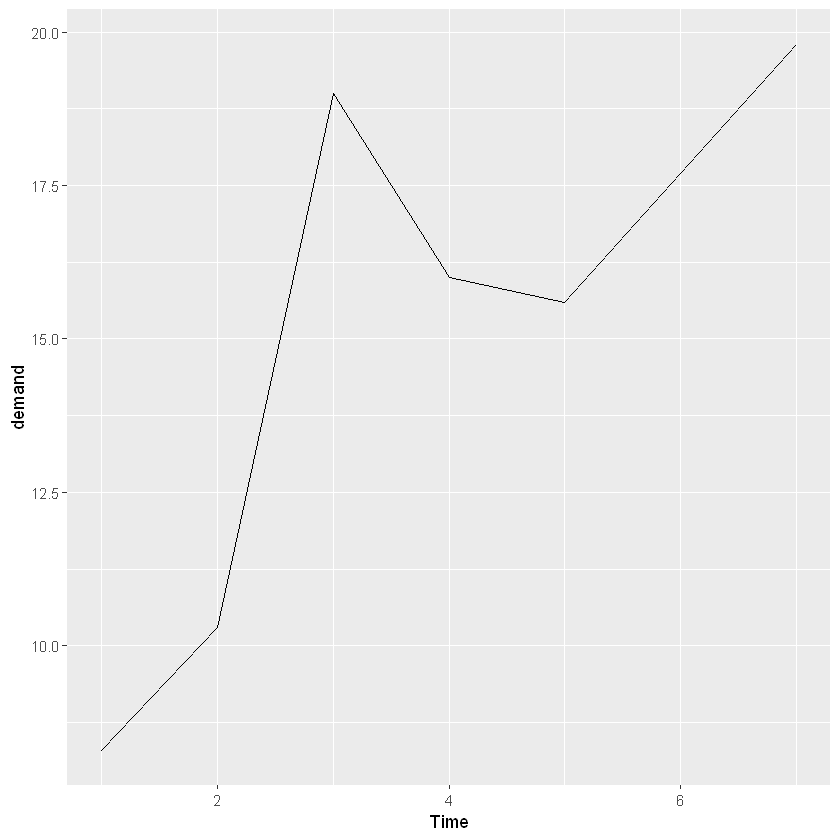

In [4]:
ggplot(BOD, aes(x = Time, y = demand)) + 
    geom_line()

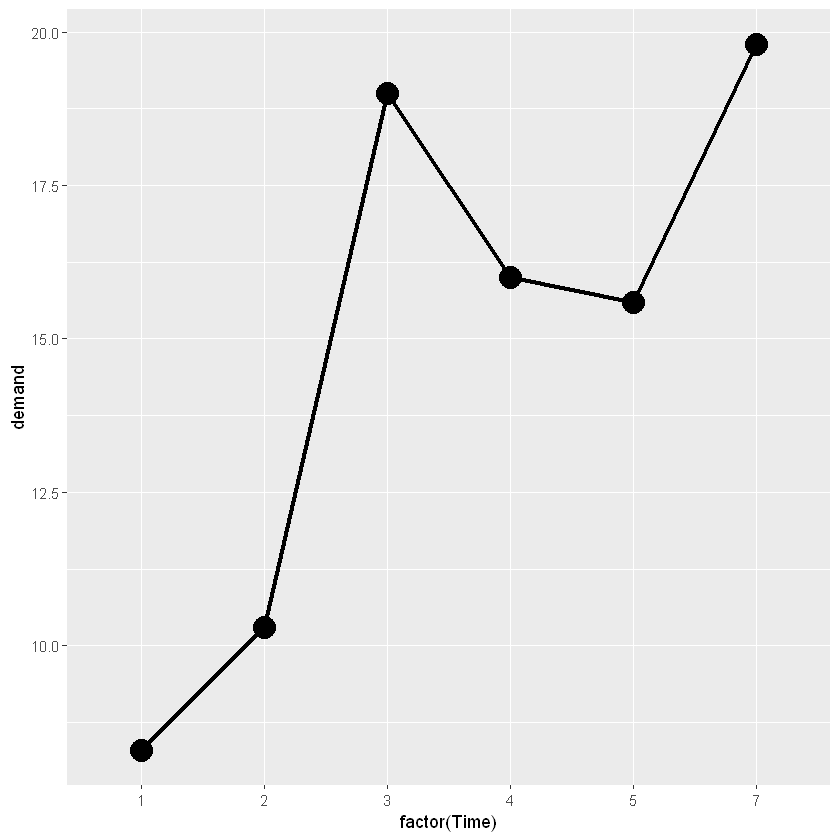

In [11]:
# 라인그래프에서 x축이 수치형이냐 범주형이냐에 따라 스케일이 달라짐
# x를 factor(범주)로 두었을 때, line으로 연결시키기 위해 group =1
# 모든 자료가 하나의 그룹임을 의미한다
ggplot(BOD, aes(x = factor(Time), y = demand, group = 1)) + 
    geom_line(size = 1.2) + geom_point(size = 6)

In [13]:
## line그래프는 x축 y축의 스케일을 어떻게 축소 or 확대하냐가 
# 시각화의 관건
head(worldpop)

Year,Population
-10000,2431
-9000,3564
-8000,5136
-7000,7562
-6000,11461
-5000,17920


In [15]:
# year라는 인구수 시계열 자료
str(worldpop)

'data.frame':	58 obs. of  2 variables:
 $ Year      : int  -10000 -9000 -8000 -7000 -6000 -5000 -4000 -3000 -2000 -1000 ...
 $ Population: int  2431 3564 5136 7562 11461 17920 28370 44820 72108 115066 ...


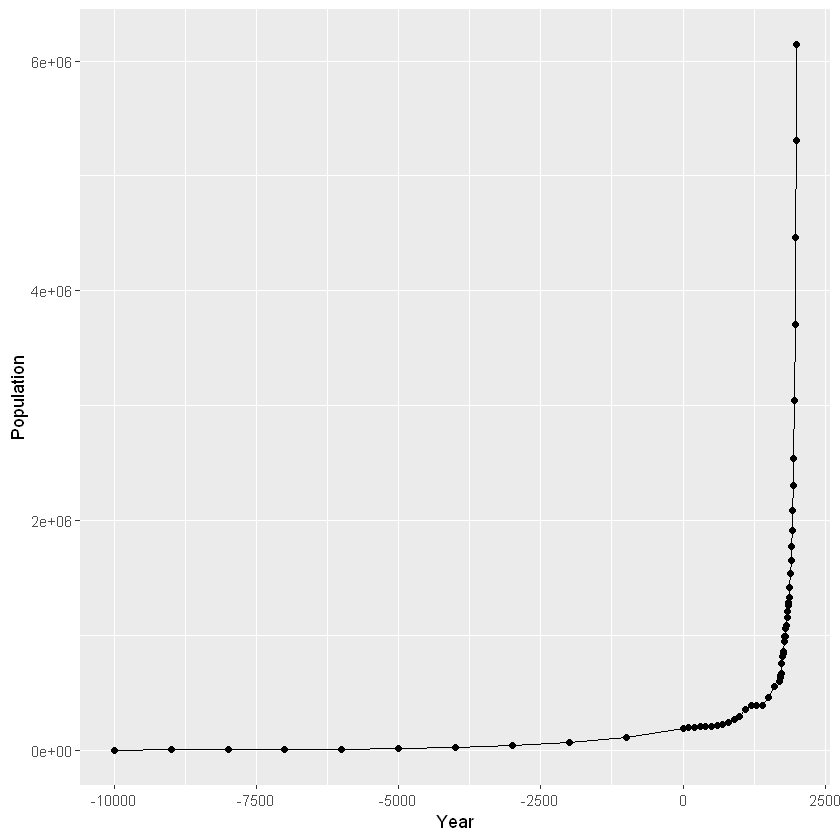

In [23]:
ggplot(worldpop, aes(x = Year, y = Population)) +
    geom_line() + geom_point()

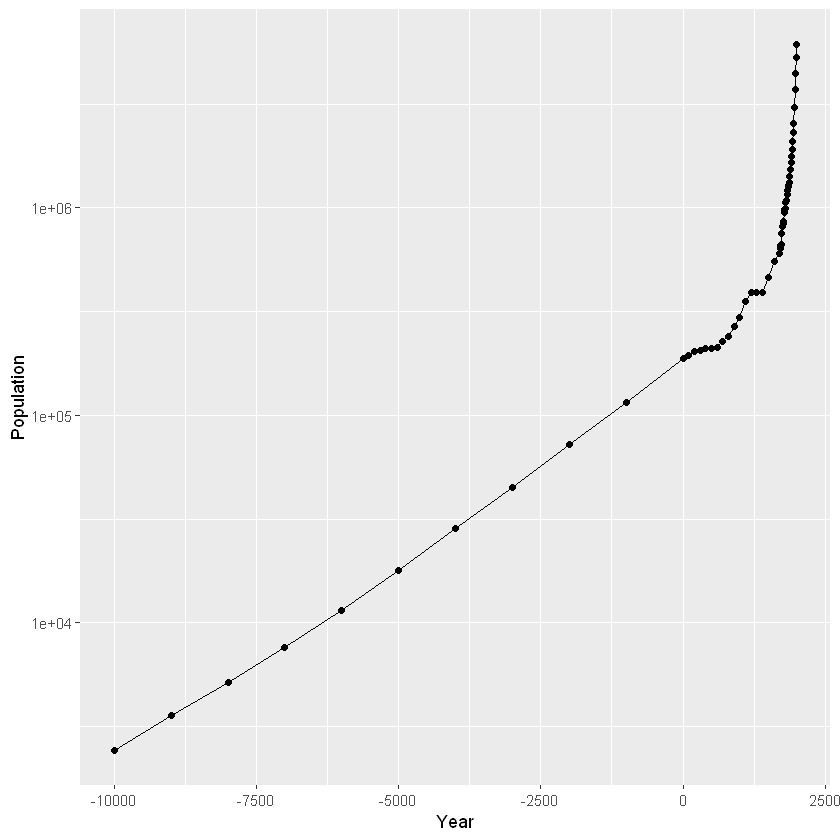

In [25]:
# y축의 스케일을 log10으로 변환
ggplot(worldpop, aes(x = Year, y = Population)) +
    geom_line() + geom_point() +
    scale_y_log10()

## group에 따라 2개 line 시각화

In [26]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [27]:
# supp는 두개의 범주로 (범주) -> 나누기
# length는 길이 (수치)
# dose는 투여량 (수치)
str(ToothGrowth)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [28]:
library(plyr)

In [30]:
(df <- ddply(ToothGrowth, c('supp', 'dose'), summarise, length= mean(len)))

supp,dose,length
OJ,0.5,13.23
OJ,1.0,22.70
OJ,2.0,26.06
VC,0.5,7.98
VC,1.0,16.77
VC,2.0,26.14


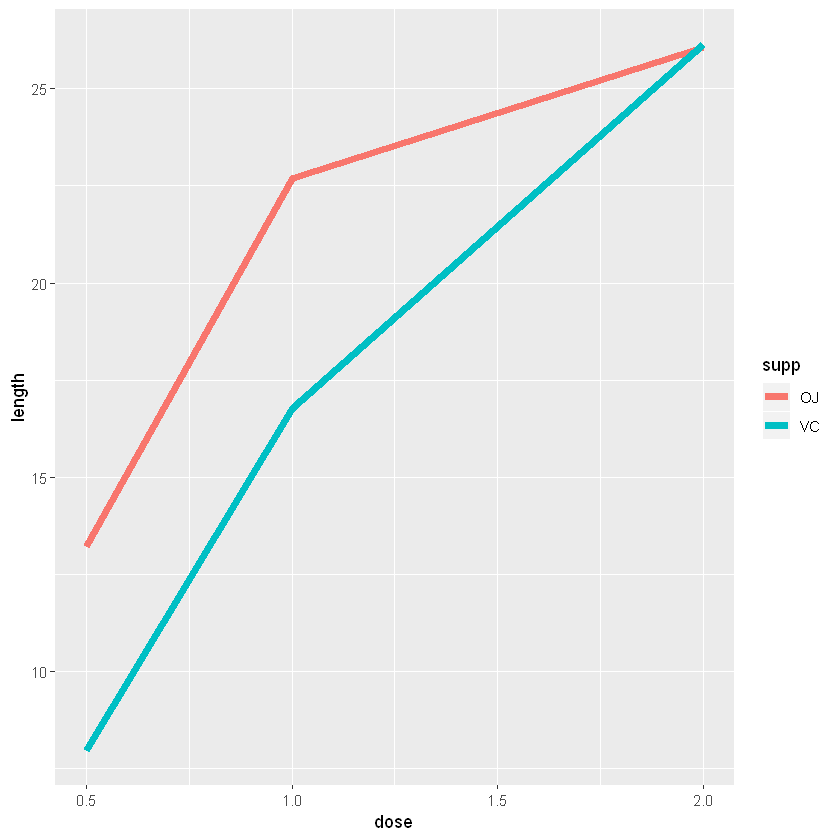

In [36]:
# supp에 범주에 따라 dose와 length가 할당되고
# 구분되는 기준은 supp와 dose임
ggplot(df, aes(x = dose, y = length, color = supp,
              )) + 
    geom_line(size = 2)

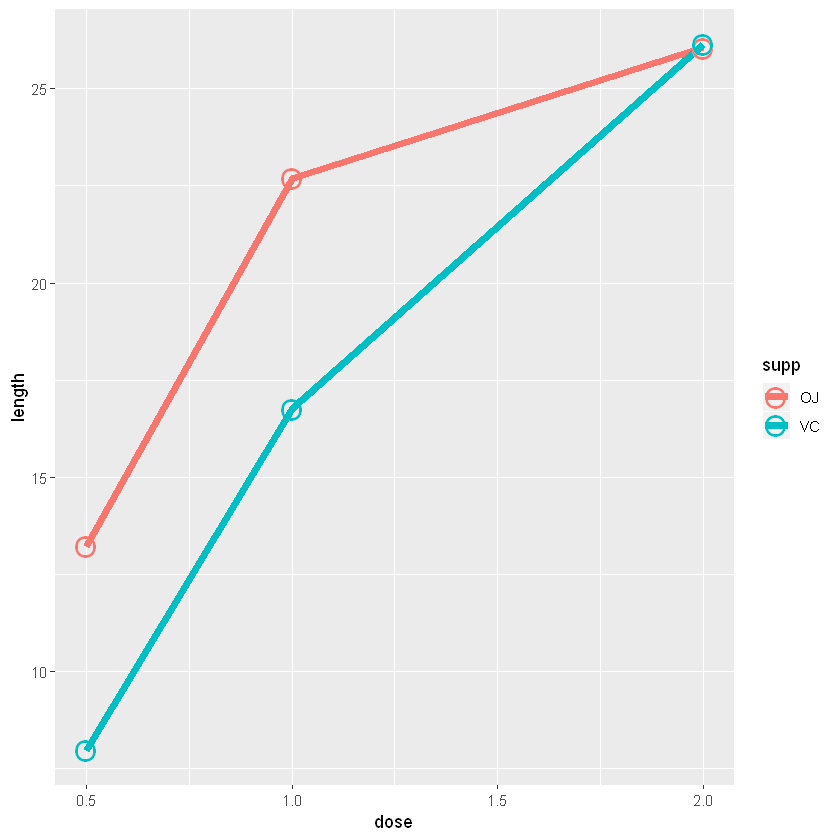

In [38]:
ggplot(df, aes(x = dose, y = length, color = supp)) + 
    geom_line(size = 2) +
    geom_point(size = 6, shape = 'O')

## Stacked graph

In [4]:
sunspotyear <- data.frame(Year = as.numeric(time(sunspot.year)), Sunspots = as.numeric(sunspot.year))

In [5]:
head(sunspotyear)

Year,Sunspots
1700,5
1701,11
1702,16
1703,23
1704,36
1705,58


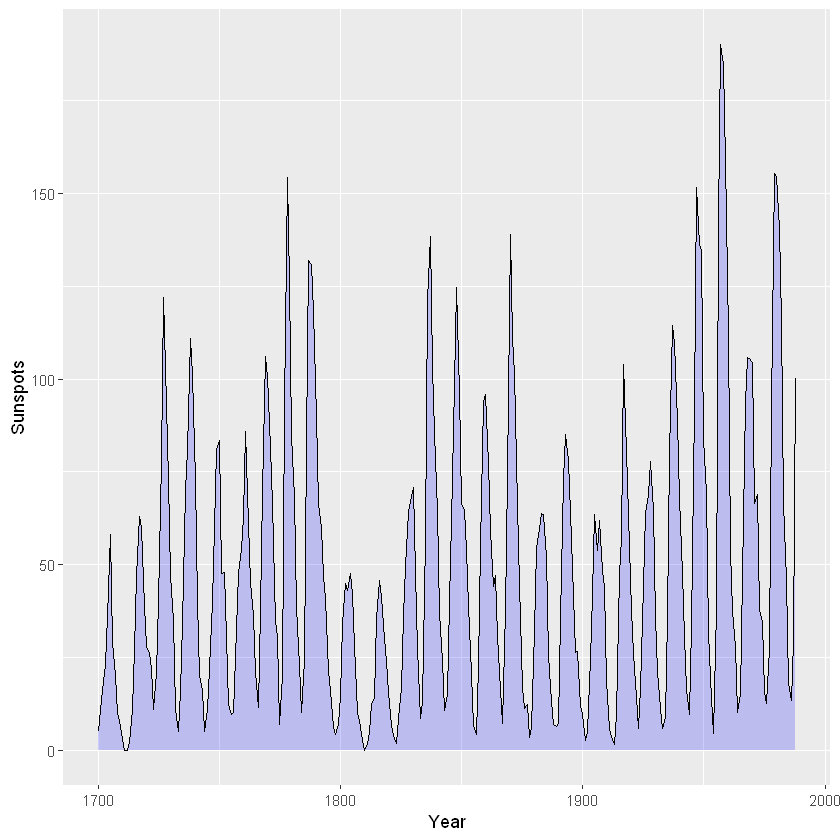

In [6]:
ggplot(sunspotyear, aes(x = Year, y = Sunspots)) + geom_area(fill = 'blue',
                                                            alpha = 0.2) + geom_line()

In [7]:
### Making a Stacked Area Graph

In [8]:
head(uspopage)

Year,AgeGroup,Thousands
1900,<5,9181
1900,5-14,16966
1900,15-24,14951
1900,25-34,12161
1900,35-44,9273
1900,45-54,6437


In [9]:
str(uspopage)

'data.frame':	824 obs. of  3 variables:
 $ Year     : int  1900 1900 1900 1900 1900 1900 1900 1900 1901 1901 ...
 $ AgeGroup : Factor w/ 8 levels "<5","5-14","15-24",..: 1 2 3 4 5 6 7 8 1 2 ...
 $ Thousands: int  9181 16966 14951 12161 9273 6437 4026 3099 9336 17158 ...


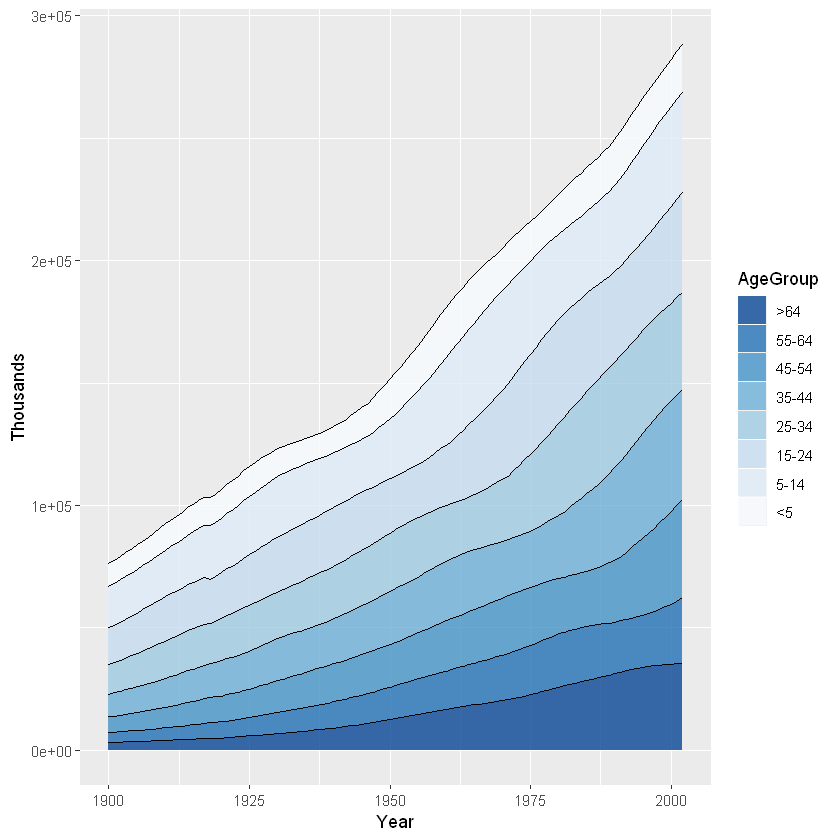

In [10]:
ggplot(uspopage, aes(x = Year, y = Thousands, fill = AgeGroup)) + geom_area(
color = NA, size = 0.2, alpha = 0.8
) + scale_fill_brewer(palette = 'Blues', breaks = rev(levels(uspopage$AgeGroup)))+
geom_line(position = 'stack')

# Adding a Confidence Region

In [12]:
# Anomaly10y 평균온도
# Unc10y 온도의 표준편차
head(climate)

Source,Year,Anomaly1y,Anomaly5y,Anomaly10y,Unc10y
Berkeley,1800,NA,NA,-0.435,0.505
Berkeley,1801,NA,NA,-0.453,0.493
Berkeley,1802,NA,NA,-0.460,0.486
Berkeley,1803,NA,NA,-0.493,0.489
Berkeley,1804,NA,NA,-0.536,0.483
Berkeley,1805,NA,NA,-0.541,0.475


In [13]:
str(climate)

'data.frame':	499 obs. of  6 variables:
 $ Source    : chr  "Berkeley" "Berkeley" "Berkeley" "Berkeley" ...
 $ Year      : num  1800 1801 1802 1803 1804 ...
 $ Anomaly1y : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Anomaly5y : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Anomaly10y: num  -0.435 -0.453 -0.46 -0.493 -0.536 -0.541 -0.59 -0.695 -0.763 -0.818 ...
 $ Unc10y    : num  0.505 0.493 0.486 0.489 0.483 0.475 0.468 0.461 0.453 0.451 ...


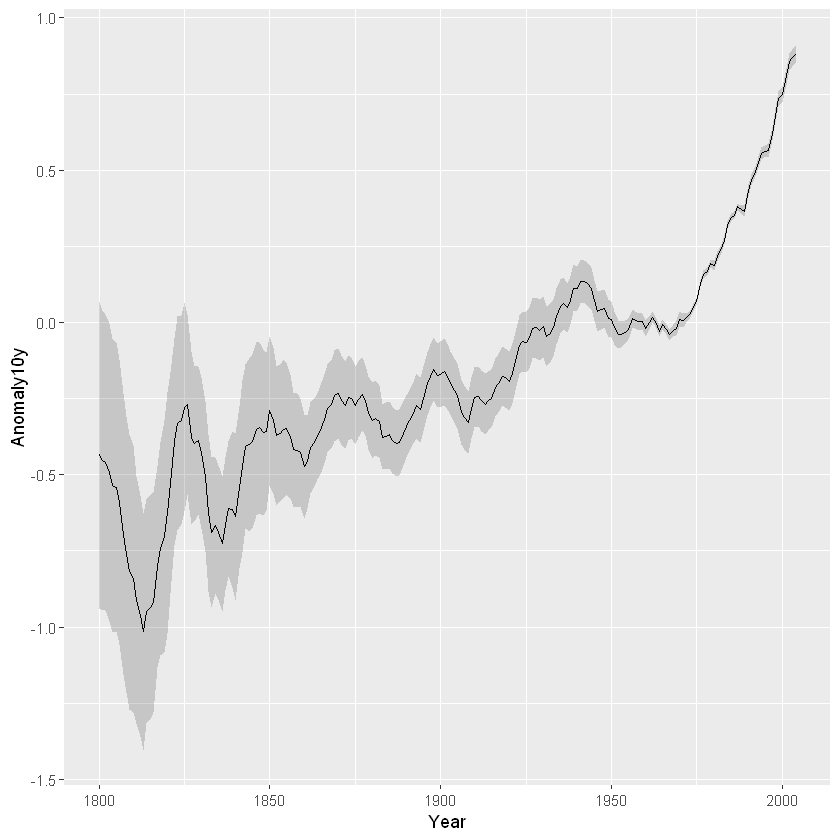

In [14]:
# 신뢰구간
clim <- subset(climate, Source == 'Berkeley',
              select = c('Year', 'Anomaly10y', 'Unc10y'))
p <- ggplot(clim, aes(x = Year, y = Anomaly10y))
p + geom_ribbon(aes(ymin = Anomaly10y - Unc10y,
                   ymax = Anomaly10y + Unc10y),
               alpha = 0.2) + geom_line()

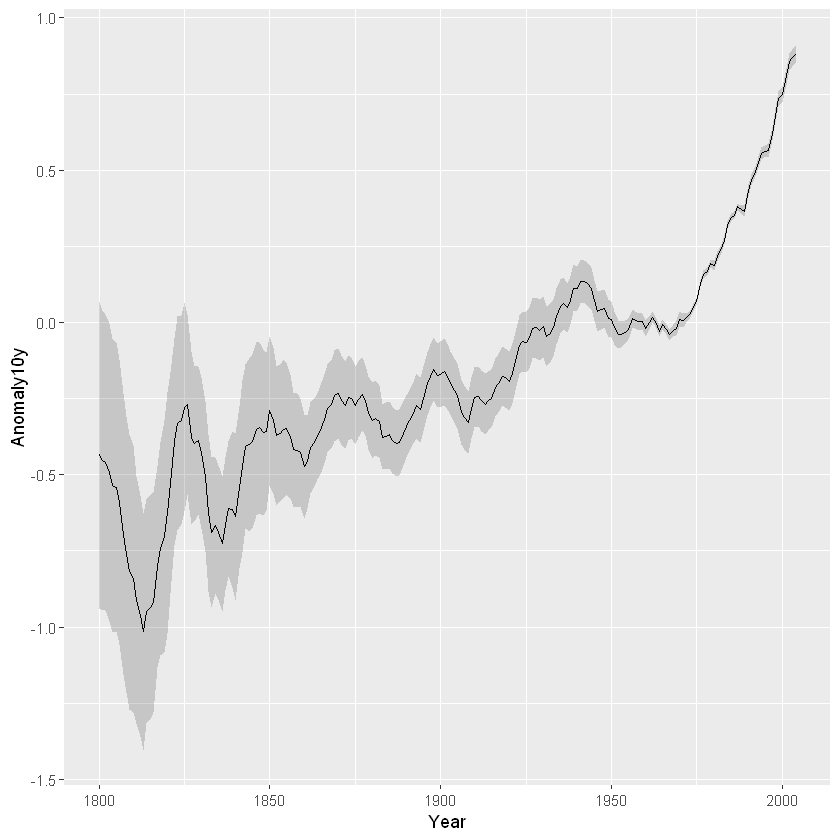

In [15]:
p <- ggplot(clim, aes(x = Year, y = Anomaly10y, 
                     ymin = Anomaly10y - Unc10y,
                   ymax = Anomaly10y + Unc10y))

p + geom_ribbon(alpha = 0.2) + geom_line()

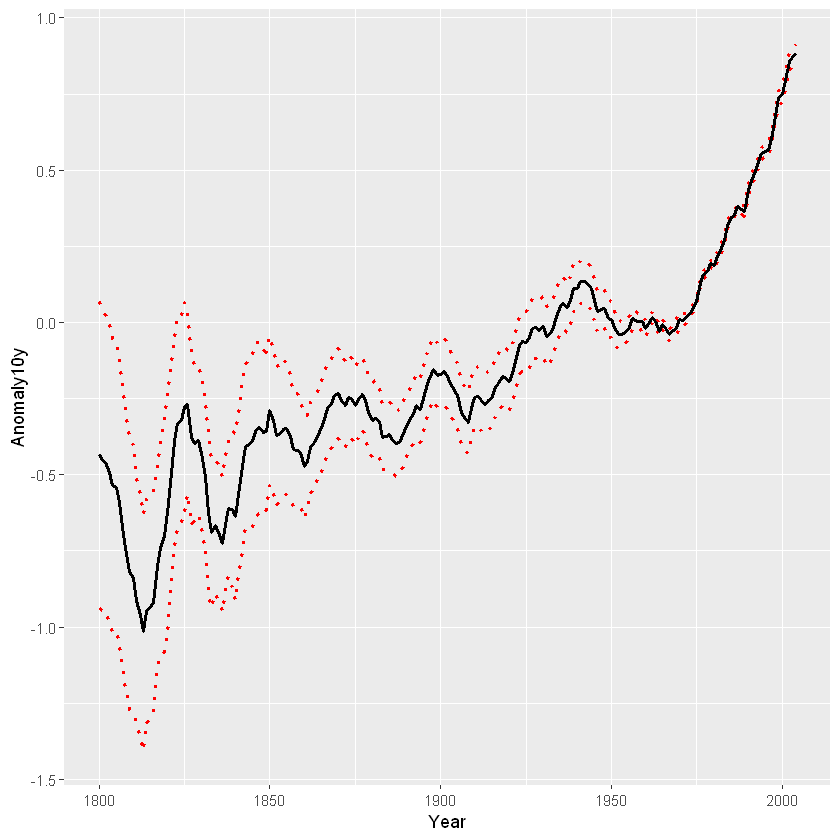

In [16]:
# dotted lines
# max min 각각에 aes를 적용해준다
size = 0.9
p + geom_line(aes(y = Anomaly10y - Unc10y), color = 'red', linetype = 'dotted',
                 size = size) +
  geom_line(aes(y = Anomaly10y + Unc10y), color = 'red', linetype = 'dotted',
           size = size) + 
  geom_line(lwd = 1)

### Scatter Plots

In [17]:
head(heightweight)

sex,ageYear,ageMonth,heightIn,weightLb
f,11.92,143,56.3,85.0
f,12.92,155,62.3,105.0
f,12.75,153,63.3,108.0
f,13.42,161,59.0,92.0
f,15.92,191,62.5,112.5
f,14.25,171,62.5,112.0


In [18]:
head(heightweight[, c('sex', 'heightIn')])

sex,heightIn
f,56.3
f,62.3
f,63.3
f,59.0
f,62.5
f,62.5


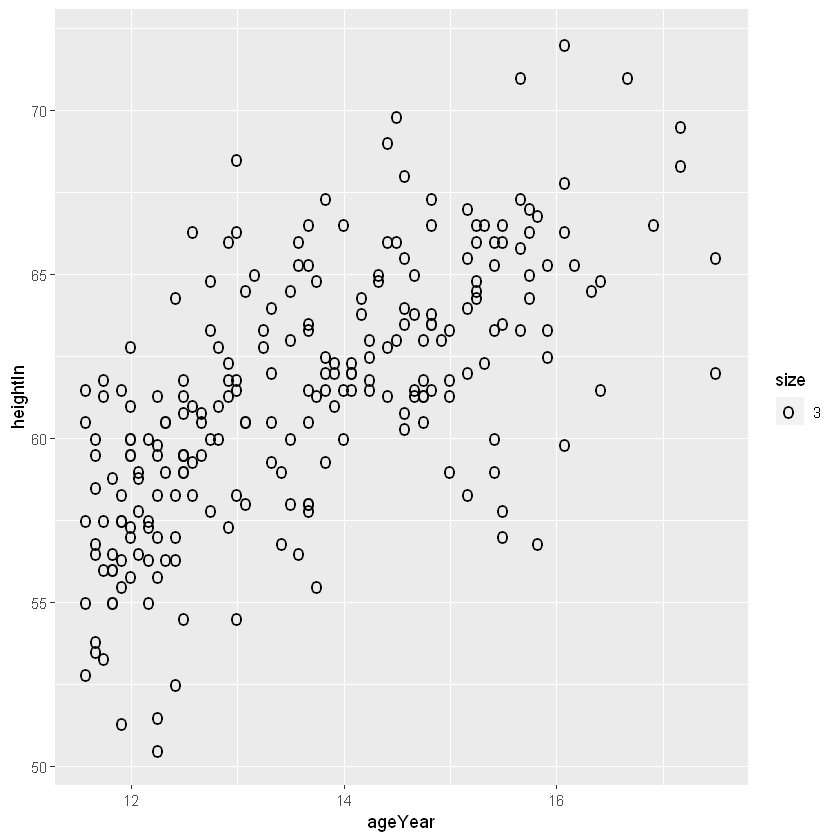

In [19]:
p <- ggplot(heightweight, aes(x = ageYear, 
                             y = heightIn, size = 3))
p + geom_point(shape = 'o') 

In [20]:
head(heightweight[, c('sex', 'ageYear', 'heightIn')])

sex,ageYear,heightIn
f,11.92,56.3
f,12.92,62.3
f,12.75,63.3
f,13.42,59.0
f,15.92,62.5
f,14.25,62.5


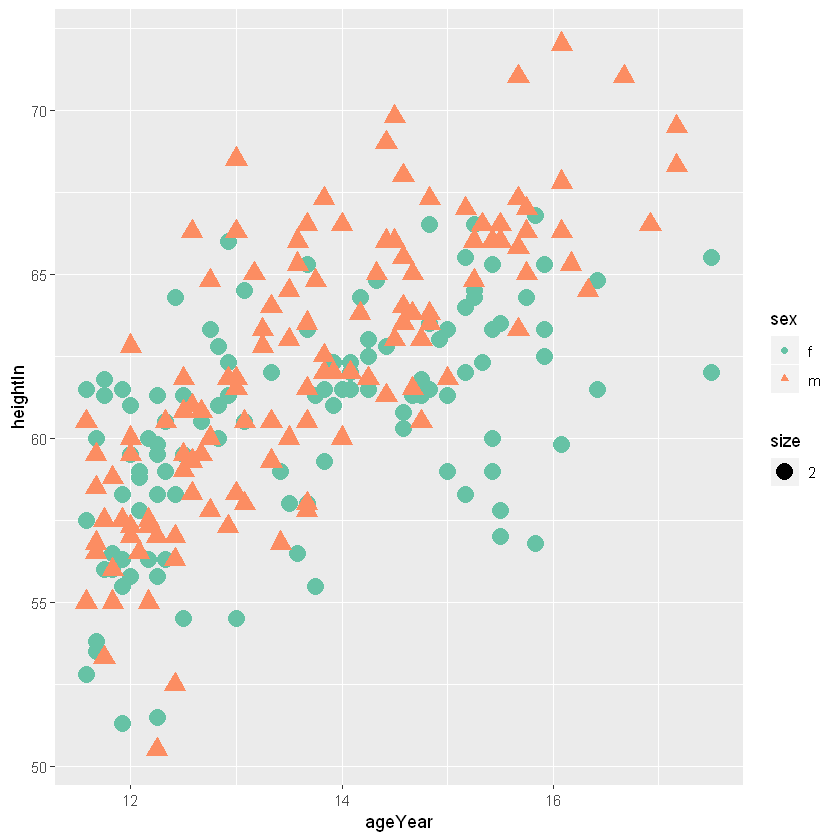

In [21]:
p <- ggplot(heightweight, aes(x = ageYear, y = heightIn,
                              shape = sex,
                             color = sex,
                             size = 2)) 
p + geom_point() +   scale_color_brewer(palette = 'Set2')

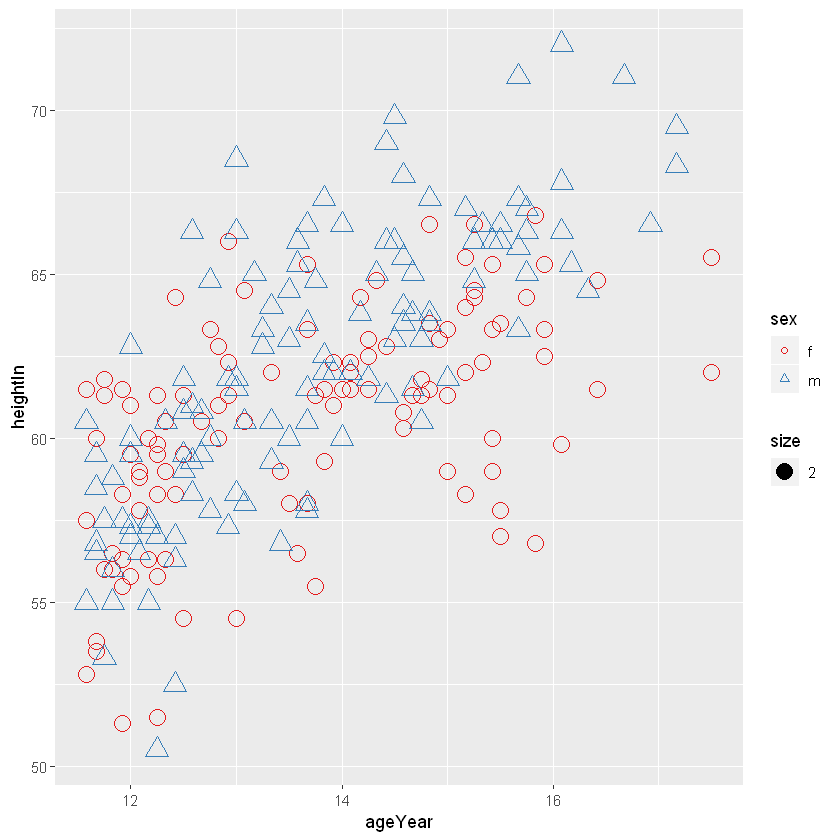

In [22]:
p + geom_point() + scale_shape_manual(values = c(1, 2)) +
  scale_color_brewer(palette = 'Set1')

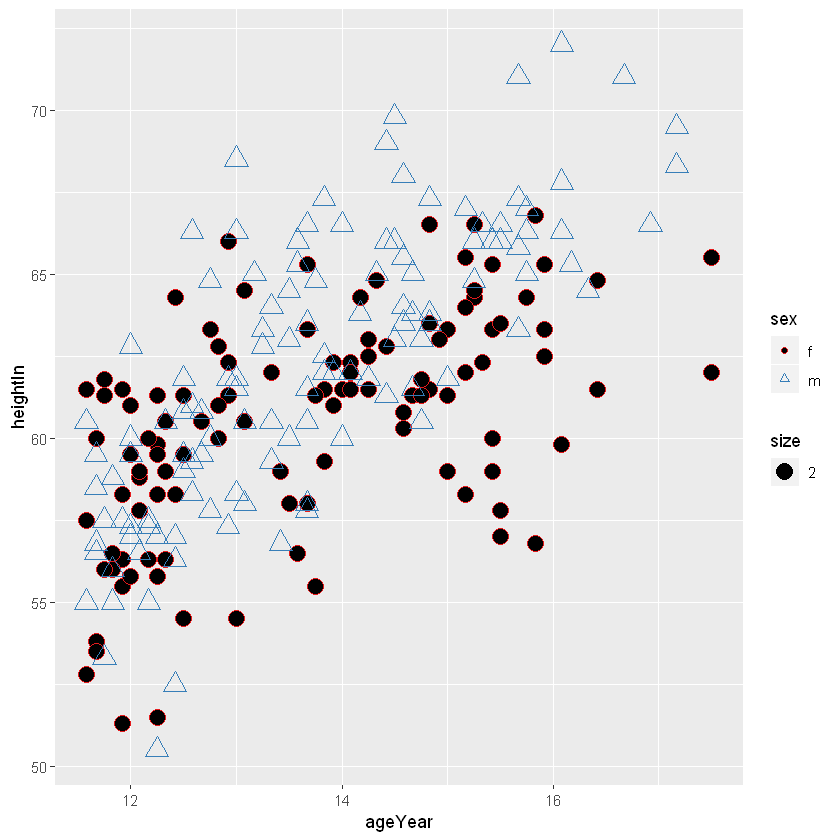

In [23]:
p + geom_point(fill = 'black') + scale_shape_manual(values = c(21, 2)) +
  scale_color_brewer(palette = 'Set1')

In [24]:
## Using Different Point Shapes

In [25]:
head(heightweight)

sex,ageYear,ageMonth,heightIn,weightLb
f,11.92,143,56.3,85.0
f,12.92,155,62.3,105.0
f,12.75,153,63.3,108.0
f,13.42,161,59.0,92.0
f,15.92,191,62.5,112.5
f,14.25,171,62.5,112.0


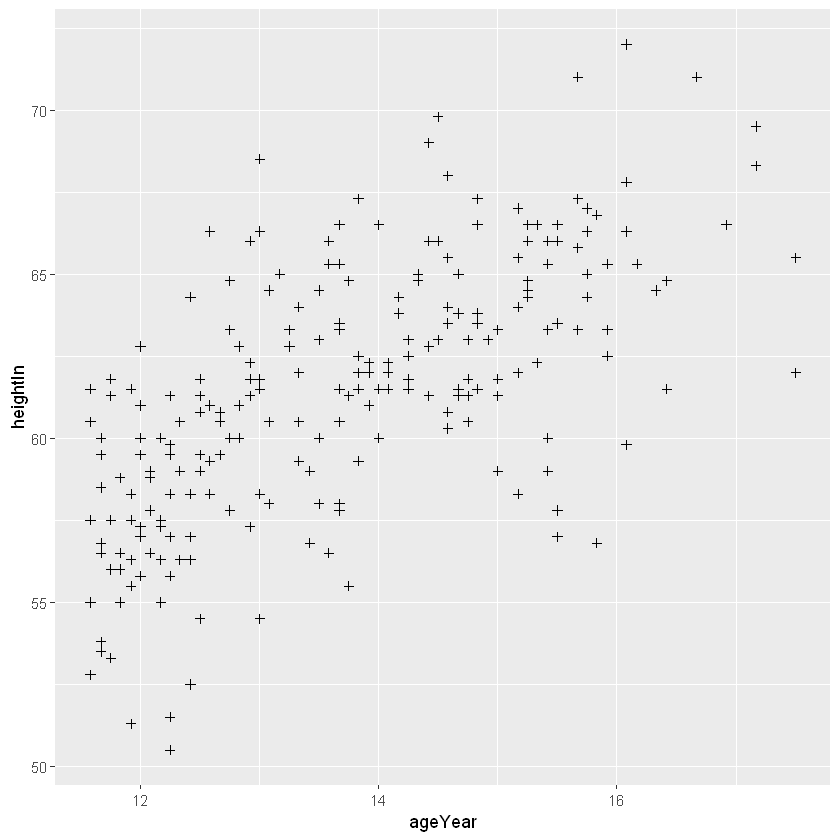

In [26]:
ggplot(heightweight, aes(x = ageYear, y =  heightIn,
                        shape = sex)) + geom_point(shape = 3) + scale_shape_manual(values = c('f', 'm'))

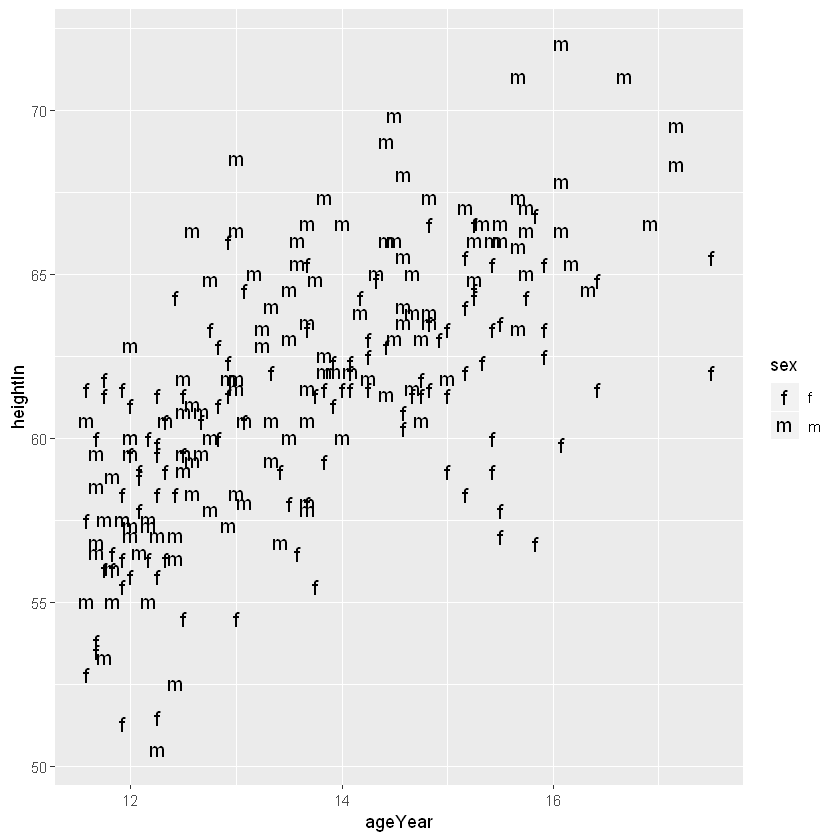

In [27]:
ggplot(heightweight, aes(x = ageYear, y = heightIn, shape = sex)) +
  geom_point(size = 4) + scale_shape_manual(values = c('f', 'm'))

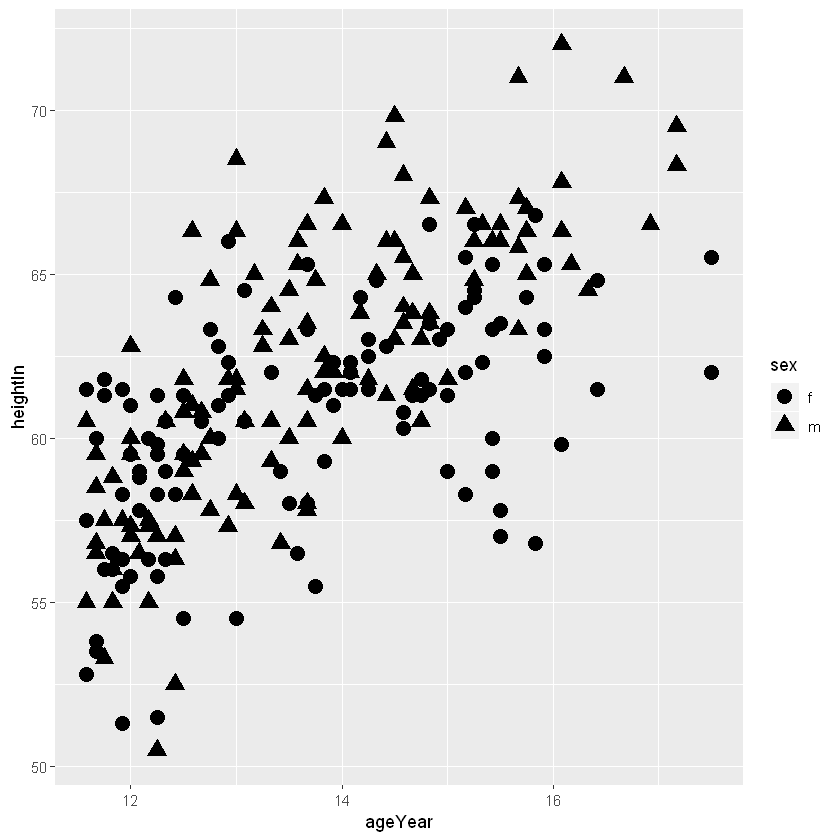

In [28]:
ggplot(heightweight, aes(x = ageYear, y = heightIn, shape = sex)) +
  geom_point(size = 4) + scale_size_manual(values = c(2,1))

In [29]:
hw <- heightweight
head(hw)

sex,ageYear,ageMonth,heightIn,weightLb
f,11.92,143,56.3,85.0
f,12.92,155,62.3,105.0
f,12.75,153,63.3,108.0
f,13.42,161,59.0,92.0
f,15.92,191,62.5,112.5
f,14.25,171,62.5,112.0


In [30]:
hw$weightGroup <- cut(hw$weightLb, breaks = c(-Inf, 100, Inf)
                     ,labels = c('< 100', '>=100')) # 100 아래 100 위에로 3cut
head(hw)

sex,ageYear,ageMonth,heightIn,weightLb,weightGroup
f,11.92,143,56.3,85.0,< 100
f,12.92,155,62.3,105.0,>=100
f,12.75,153,63.3,108.0,>=100
f,13.42,161,59.0,92.0,< 100
f,15.92,191,62.5,112.5,>=100
f,14.25,171,62.5,112.0,>=100


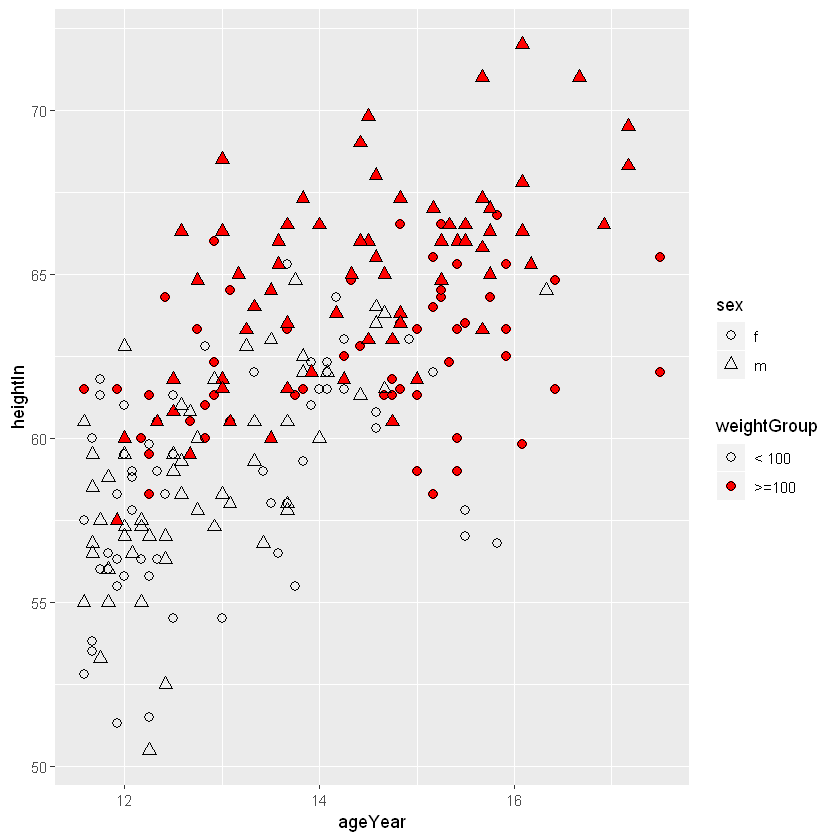

In [31]:
# 몸무게가 100파운드 이상, 이하를 cut하고
# scatter plotting 하되 성 별로 구분하기

# 나이가 어릴 때는 크게 구분되지 않음
# 15세(사춘기) 이후 부터 남성 여성 별로 키와 몸무게가 구분됨
# 키가 65 이상부터는 여성의 분포가 적어진다

ggplot(hw, aes(x = ageYear, y = heightIn, shape = sex, fill = weightGroup)) +
  geom_point(size = 2.5) +
  scale_shape_manual(values = c(21, 24)) +
  scale_fill_manual(values = c(alpha('black', 0), 'red'), 
                    guide = guide_legend(override.aes = list(shape = 21)))

In [32]:
head(hw)

sex,ageYear,ageMonth,heightIn,weightLb,weightGroup
f,11.92,143,56.3,85.0,< 100
f,12.92,155,62.3,105.0,>=100
f,12.75,153,63.3,108.0,>=100
f,13.42,161,59.0,92.0,< 100
f,15.92,191,62.5,112.5,>=100
f,14.25,171,62.5,112.0,>=100


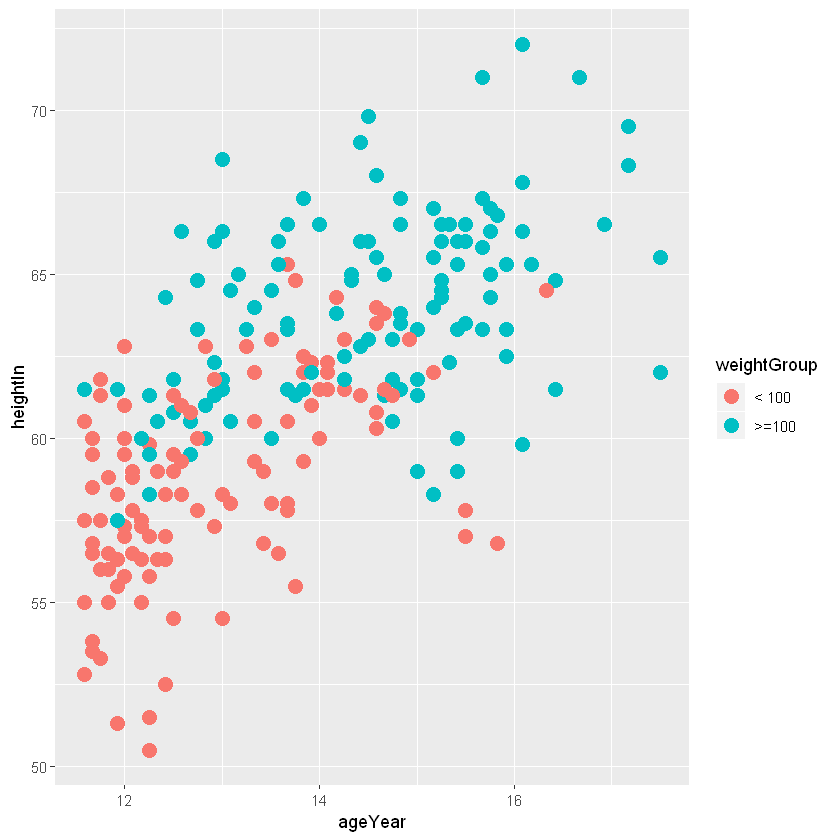

In [33]:
# 몸무게가 100파운드 이하는 키와 나이가 적음

ggplot(hw, aes(x = ageYear, y = heightIn, color = weightGroup)) +geom_point(size = 4)

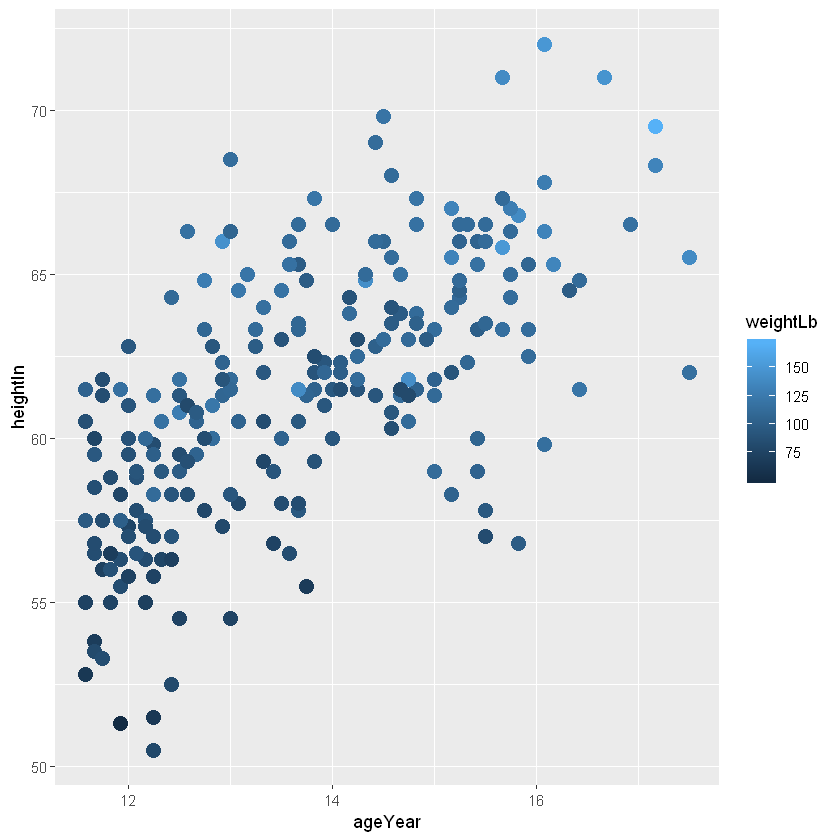

In [34]:
# 몸무게가 무거울 수록 키가 크고 나이가 많으나
# 나이가 14 이하일 때는 분포가 잘 구분되지 않음
ggplot(heightweight, aes(x = ageYear, y = heightIn, color = weightLb)) +geom_point(size = 4) 

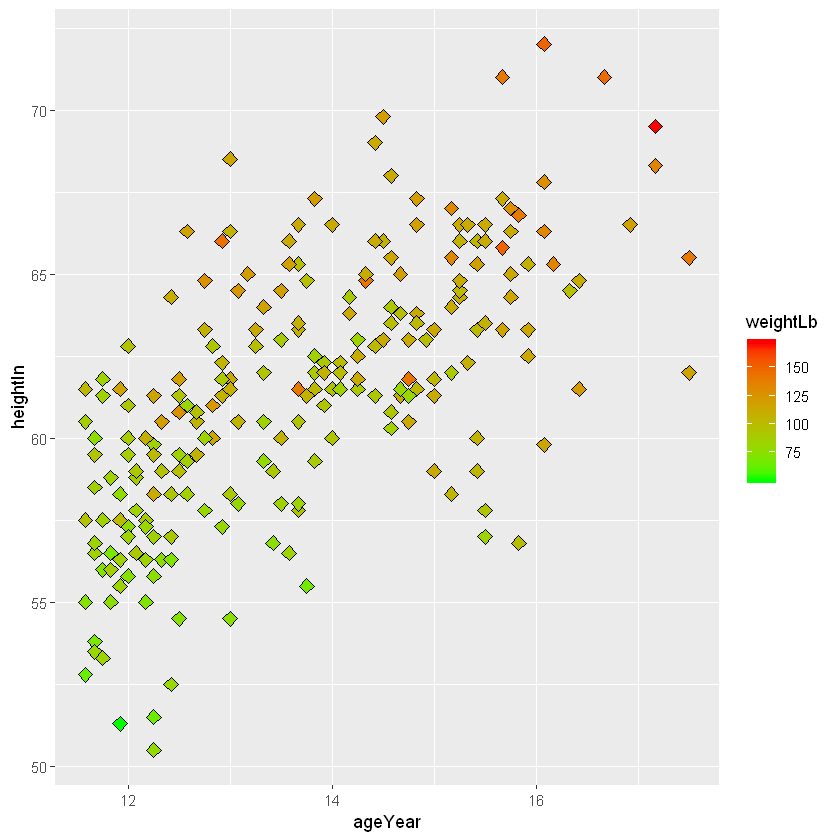

In [35]:
ggplot(hw, aes(x = ageYear, y = heightIn, fill = weightLb)) +
    geom_point(shape = 23, size = 3) +
    scale_fill_gradient(low = 'green', high = 'red')

In [36]:
head(hw)

sex,ageYear,ageMonth,heightIn,weightLb,weightGroup
f,11.92,143,56.3,85.0,< 100
f,12.92,155,62.3,105.0,>=100
f,12.75,153,63.3,108.0,>=100
f,13.42,161,59.0,92.0,< 100
f,15.92,191,62.5,112.5,>=100
f,14.25,171,62.5,112.0,>=100


In [37]:
mean(hw$weightLb)

[1] 101.0106

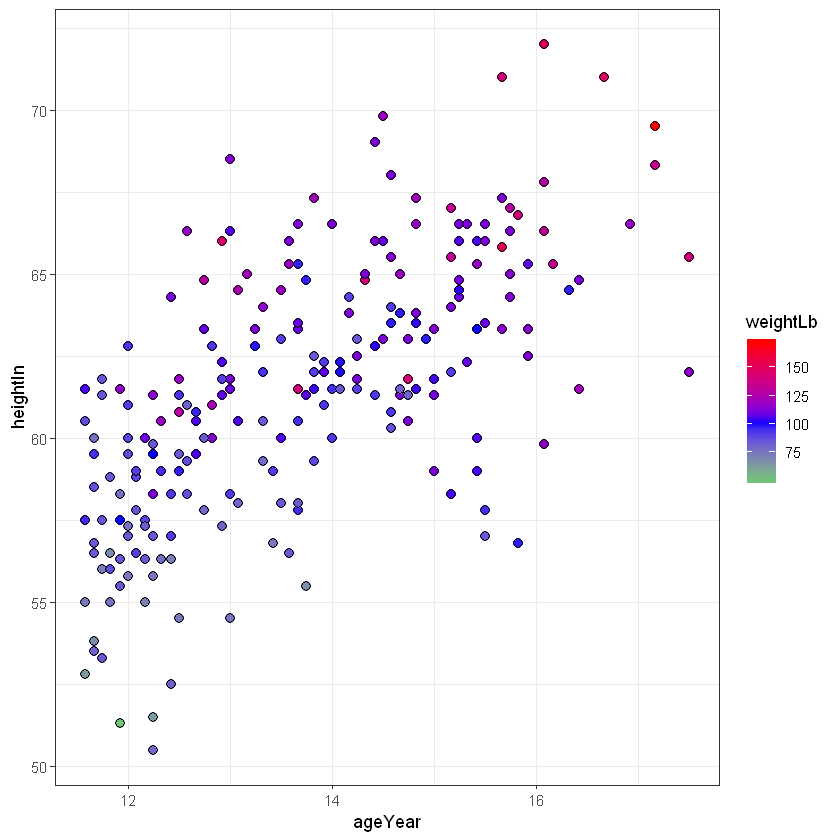

In [38]:
ggplot(hw, aes(x = ageYear, y = heightIn, fill = weightLb)) +
        geom_point(shape = 21, size = 2.5) +
        scale_fill_gradient2(low = 'green', mid = 'blue', high = 'red', 
                            midpoint = mean(hw$weightLb)) + theme_bw()

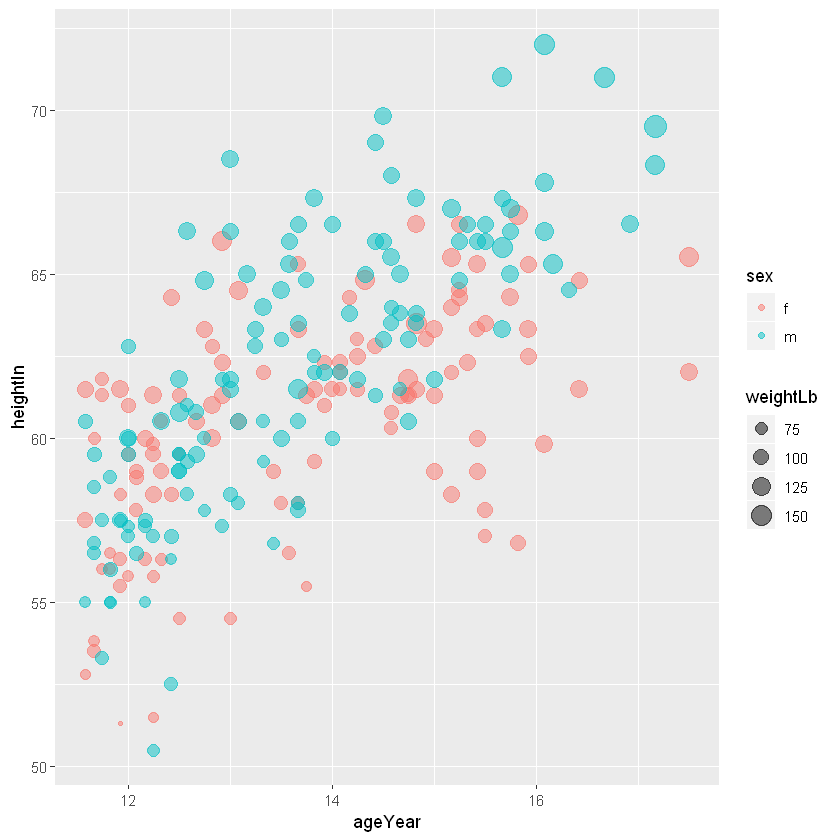

In [39]:
ggplot(heightweight, aes(x = ageYear, y = heightIn, size = weightLb, color = sex)) +
  geom_point(alpha = 0.5) 

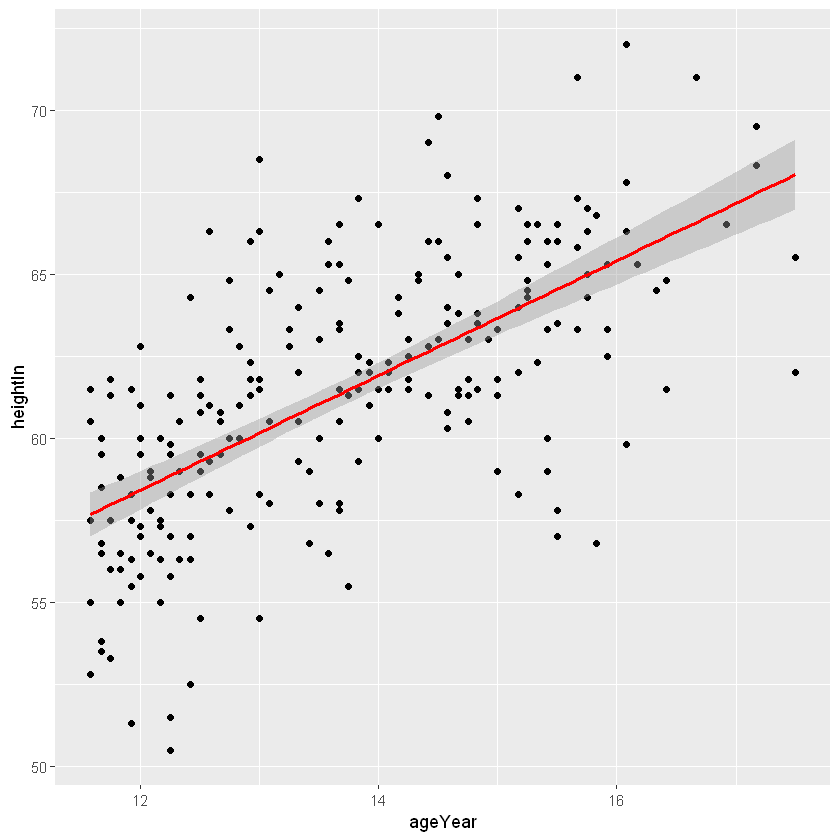

In [52]:
## 회귀선 
## shadow는 표준오차에 대응되는 95% 신뢰구간
sp <- ggplot(heightweight, aes(x = ageYear, y = heightIn))
sp + geom_point() + stat_smooth(method = lm, level = 0.95, color = 'red')

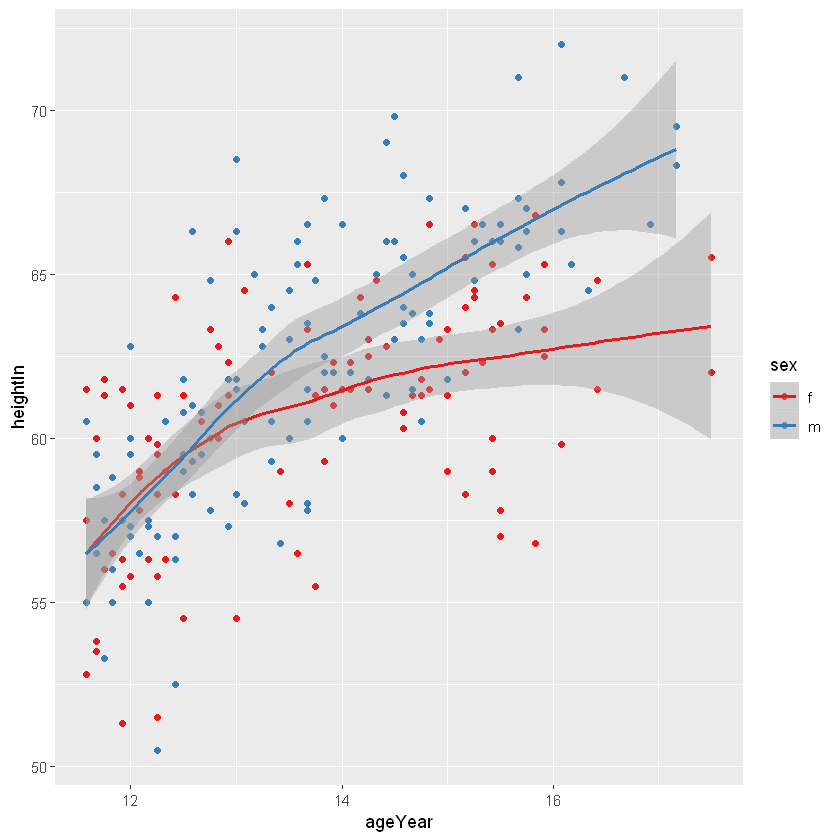

In [73]:
# 성별로 회귀직선을 구분해서 시각화
# 남성이 키가 증가하는 속도가 여성보다 빠름
sps <- ggplot(heightweight, aes(x = ageYear, y = heightIn, color = sex)) +
geom_point() + scale_color_brewer(palette = 'Set1')

sps + stat_smooth(method = 'loess')

In [75]:
# 37.4356 + 1.7483*ageYear 
model <- lm(heightIn ~ ageYear, data = heightweight)
summary(model)


Call:
lm(formula = heightIn ~ ageYear, data = heightweight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3517 -1.9006  0.1378  1.9071  8.3371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.4356     1.8281   20.48   <2e-16 ***
ageYear       1.7483     0.1329   13.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.989 on 234 degrees of freedom
Multiple R-squared:  0.4249,	Adjusted R-squared:  0.4225 
F-statistic: 172.9 on 1 and 234 DF,  p-value: < 2.2e-16


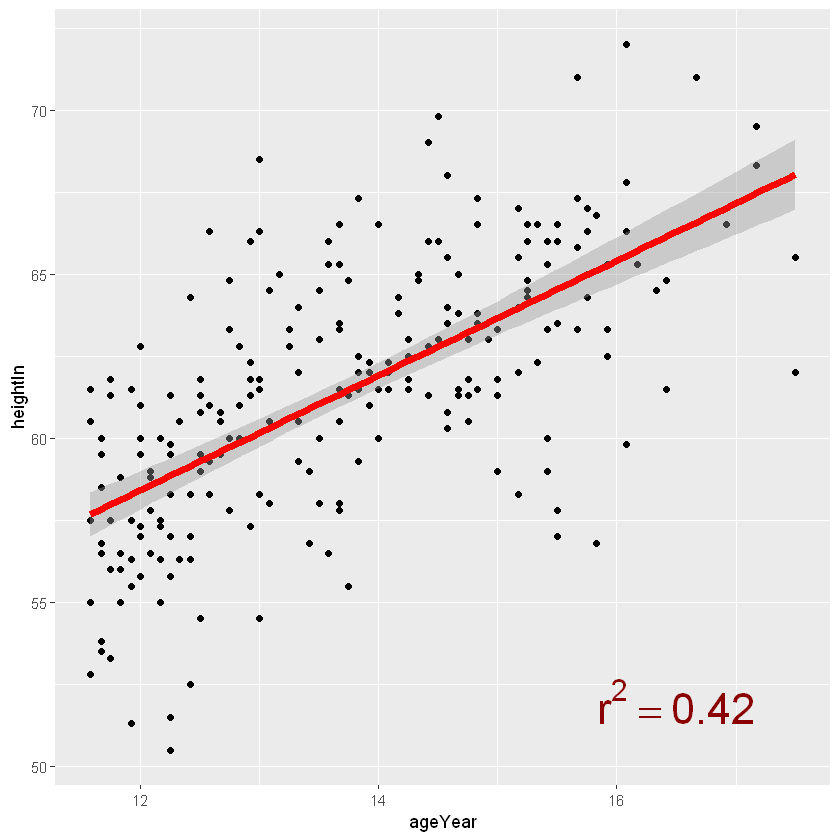

In [127]:
# Plot에 설명 삽입
sp <- ggplot(heightweight, aes(x = ageYear, y = heightIn)) + geom_point() +
    stat_smooth(method = lm, color = 'red', size = 2)
# annotate = 플롯 안에 문자 삽입하기
# x y는 어디 위치에 삽입할 건지

sp + annotate('text', label = 'r^2==0.42', parse = TRUE, x = 16.5, y = 52,
             size = 9, color = 'darkred')


In [128]:
# 37.4356 + 1.7483*ageYear 플롯에 회귀직선 식 삽입하기
model$coefficients

(Intercept)     ageYear 
  37.435574    1.748253

In [129]:
# unname = 문자 떼고 숫자만 뽑아내기
est <- unname(model$coefficients)

# italic 글씨체로 출력하기
# ~ 는 띄어쓰기
# 숫자 삽입은 list로 묶어서 제공된다
eqn <- as.character(as.expression(
  substitute(italic(y) == a + b * italic(x) * ',' ~~ italic(r)^2 ~ '=' ~ r2,
             list(a = format(est[1], digits = 3),
                  b = format(est[2], digits = 3),
                  r2 = format(summary(model)$r.squared, digits = 2)
))))
parse(text = eqn)

expression(italic(y) == "37.4" + "1.75" * italic(x) * "," ~ ~italic(r)^2 ~ 
    "=" ~ "0.42")

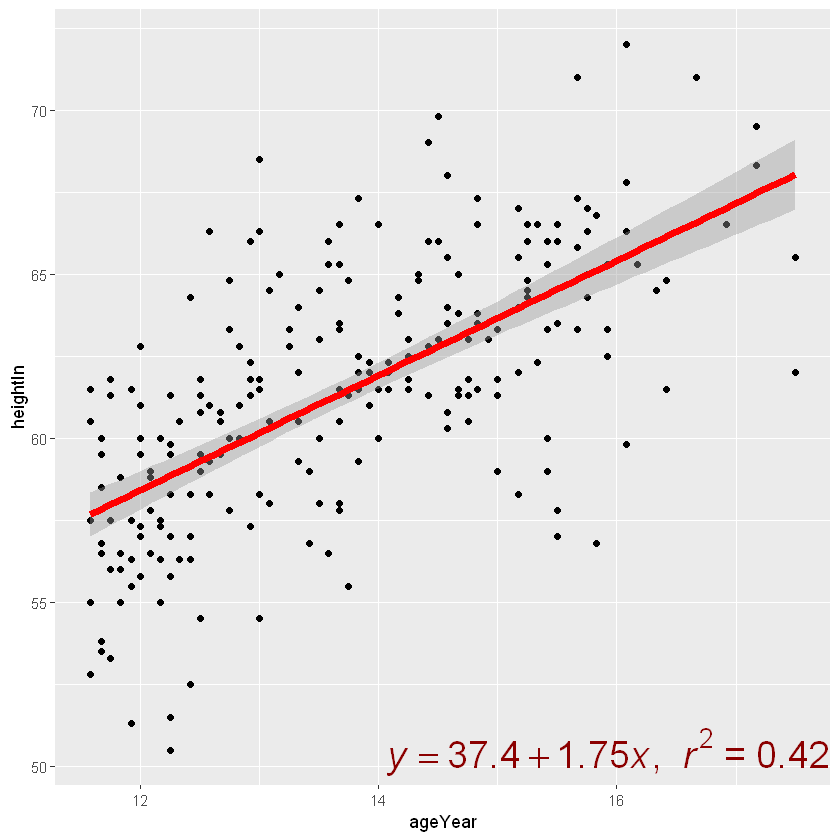

In [164]:
sp + annotate('text', label = eqn, parse = TRUE, x = Inf, y = -Inf, hjust = 1, vjust = -0.2,
             size = 8, color = 'darkred')


#### 산점도를 부분적으로 marginal하게 표현하기
##### https://www.google.com/search?q=+the+Old+Faithful+geyser+in+Yellowstone+National+Park&biw=1664&bih=959&sxsrf=ALiCzsYMlbPMUCKDZXGg43f_X6dtB9YXYg%3A1668993558771&ei=FtJ6Y6nULpO5hwP89oe4Cg&ved=0ahUKEwipt8_Bjb77AhWT3GEKHXz7AacQ4dUDCA8&uact=5&oq=+the+Old+Faithful+geyser+in+Yellowstone+National+Park&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIHCAAQgAQQEzIGCAAQHhATOgoIABBHENYEELADSgQIQRgASgQIRhgAUIUGWIUGYN8ZaARwAXgAgAGGAYgBhgGSAQMwLjGYAQCgAQKgAQHIAQnAAQE&sclient=gws-wiz-serp

In [166]:
# 간헐천의 분출과 대기시간
# 분출이 높으면 대기시간도 길어진다
head(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


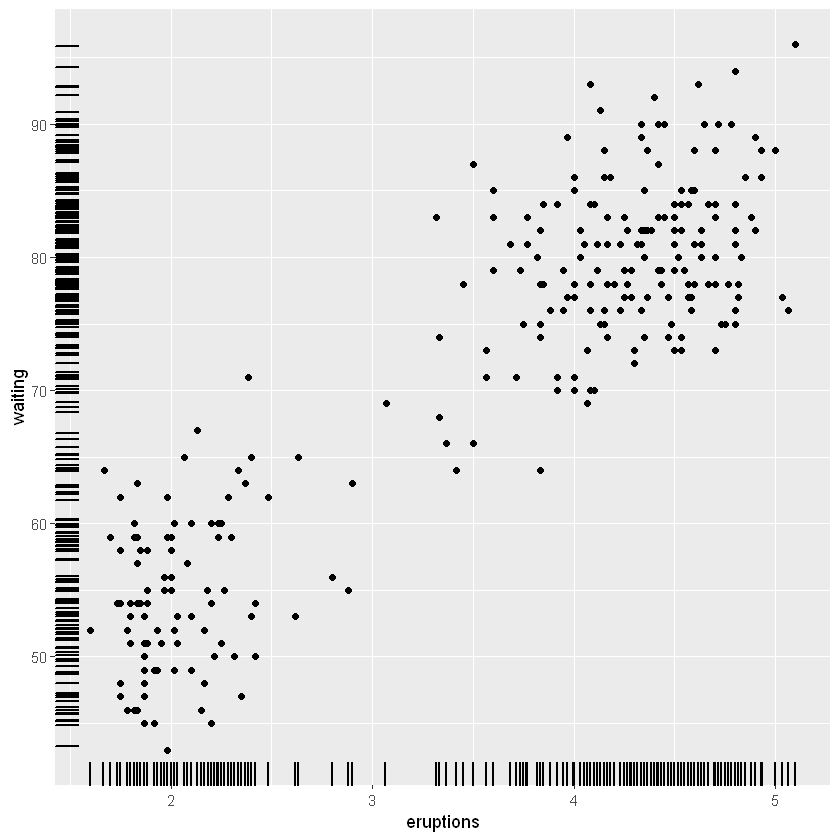

In [175]:
ggplot(faithful, aes(x = eruptions, y = waiting)) + geom_point() + geom_rug(position = 'jitter',
                                                                           size = 0.7)


#### 산점도에 labeling 하기

In [178]:
# 건강 경제에 관한 데이터
# laborrate : 취업률
# healthexp : 보건
# infmortality : 영아사망률
head(countries)

Name,Code,Year,GDP,laborrate,healthexp,infmortality
Afghanistan,AFG,1960,55.60700,NA,NA,NA
Afghanistan,AFG,1961,55.66865,NA,NA,NA
Afghanistan,AFG,1962,54.35964,NA,NA,NA
Afghanistan,AFG,1963,73.19877,NA,NA,NA
Afghanistan,AFG,1964,76.37303,NA,NA,NA
Afghanistan,AFG,1965,94.09873,NA,NA,NA


In [179]:
str(countries)

'data.frame':	11016 obs. of  7 variables:
 $ Name        : Factor w/ 216 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Code        : Factor w/ 216 levels "ABW","AFG","AGO",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Year        : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ GDP         : num  55.6 55.7 54.4 73.2 76.4 ...
 $ laborrate   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ healthexp   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ infmortality: num  NA NA NA NA NA NA NA NA NA NA ...


In [204]:
# 데이터 필터링
cs <- subset(countries, Year == 2009 & healthexp > 2000)
head(cs)

,Name,Code,Year,GDP,laborrate,healthexp,infmortality
254,Andorra,AND,2009,NA,NA,3089.636,3.1
560,Australia,AUS,2009,42130.82,65.2,3867.429,4.2
611,Austria,AUT,2009,45555.43,60.4,5037.311,3.6
968,Belgium,BEL,2009,43640.20,53.5,5104.019,3.6
1733,Canada,CAN,2009,39599.04,67.8,4379.761,5.2
2702,Denmark,DNK,2009,55933.35,65.4,6272.729,3.4


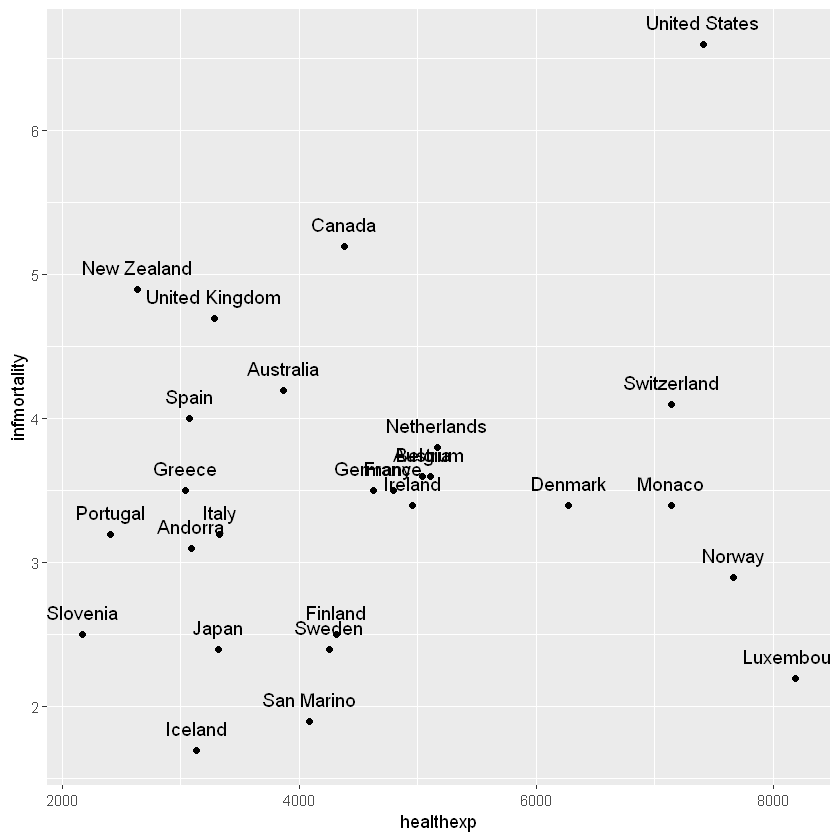

In [206]:
# geom_text, label을 어떤 변수로 구분지어서 볼 것인지
sp <- ggplot(cs, aes(x = healthexp, y = infmortality)) + geom_point()
sp + geom_text(aes(label = Name), size = 4, vjust = -1)

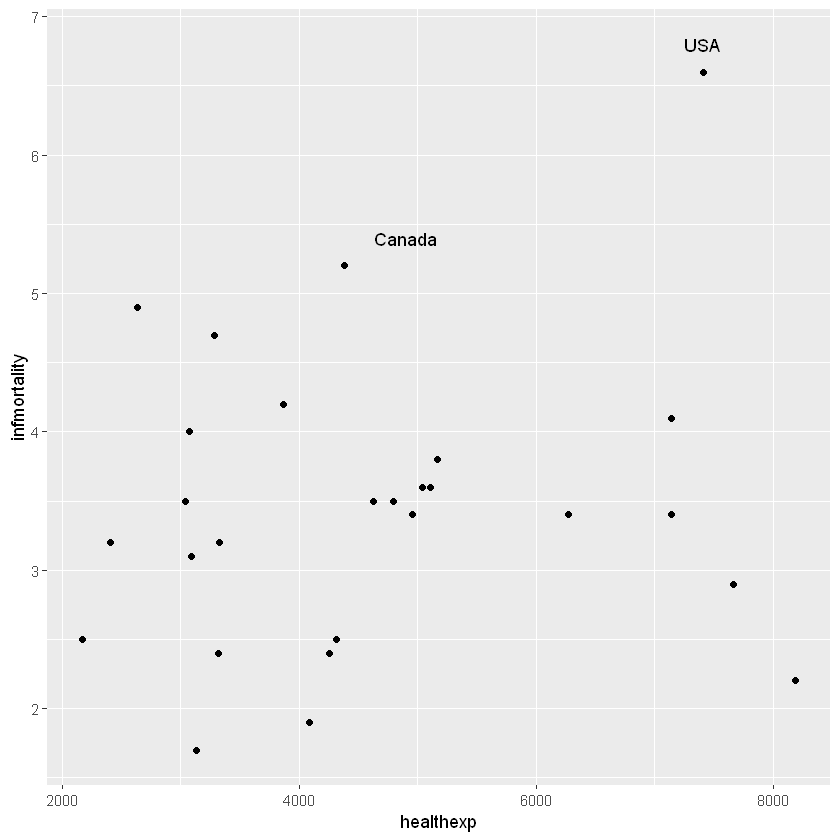

In [212]:
# 만약 일본과 미국만 보고싶다
sp + annotate('text', x = 4900, y = 5.4, label = 'Canada') +
  annotate('text', x = 7400, y = 6.8, label = 'USA')

In [216]:
cs$Name1 <- cs$Name
idx <- cs$Name1 %in% c('Canada', 'Ireland', 'United Kingdom', 'United States', 'Japan', 
                       'New Zealand', 'Iceland', 'Luxembourg', 'Netherland', 'Switzerland')
idx

[1] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[13] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[25]  TRUE  TRUE  TRUE

Warning message:
"Removed 18 rows containing missing values (geom_text)."


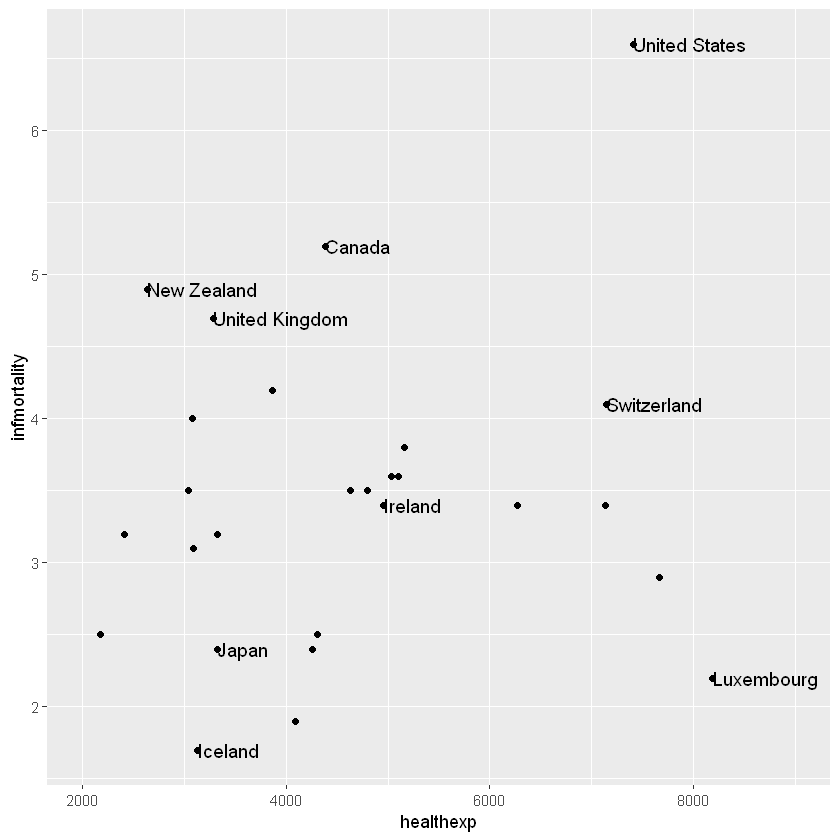

In [218]:
# vec1 %in% vec2 : 벡터 vec1의 원소 중 벡터 vec2의 원소와 같은 것만 골라냄 = (is.element(vec1, vec2))
idx <- cs$Name1 %in% c('Canada', 'Ireland', 'United Kingdom', 'United States', 'Japan', 
                       'New Zealand', 'Iceland', 'Luxembourg', 'Netherland', 'Switzerland')
cs$Name1[!idx] <- NA # 벡터에 없는 건 NA로
ggplot(cs, aes(x = healthexp, y = infmortality, label = Name1)) + geom_point() + 
  geom_text(aes(x = healthexp, label = Name1), size = 4, hjust = 0) +
  xlim(2000, 9000)

### 값의 크기에 따라서 산점도 포인트 사이즈를 다르게 하기

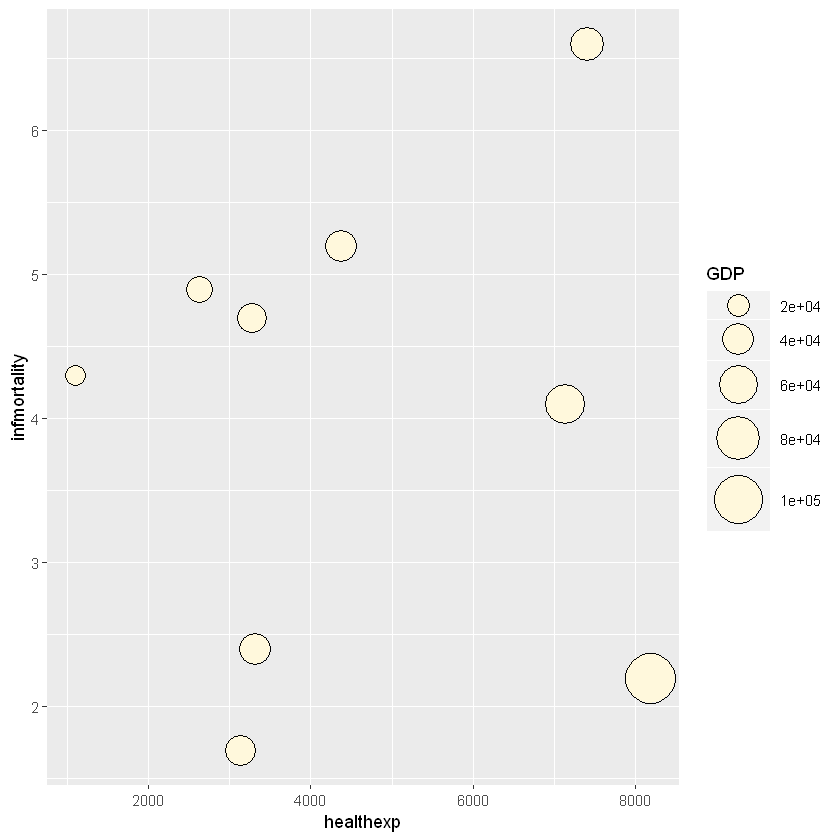

In [226]:
cdat <- subset(countries, Year == 2009 &
               Name %in% c('Canada', 'Korea, Rep.', 'United Kingdom', 'United States',
                           'New Zealand', 'Iceland', 'Japan', 'Luxembourg',
                           'Netherland', 'Switzerland'))
p <- ggplot(cdat, aes(x = healthexp, y = infmortality, size = GDP)) +
  geom_point(shape = 21, color = 'black', fill = 'cornsilk')
p + scale_size_area(max_size = 14) 

In [ ]:
# 산점도
# 회귀선
# 플롯 안에 텍스트
# 포인트의 크기

## Balloon plot

In [42]:
head(countries)

Name,Code,Year,GDP,laborrate,healthexp,infmortality
Afghanistan,AFG,1960,55.60700,NA,NA,NA
Afghanistan,AFG,1961,55.66865,NA,NA,NA
Afghanistan,AFG,1962,54.35964,NA,NA,NA
Afghanistan,AFG,1963,73.19877,NA,NA,NA
Afghanistan,AFG,1964,76.37303,NA,NA,NA
Afghanistan,AFG,1965,94.09873,NA,NA,NA


In [44]:
str(countries)

'data.frame':	11016 obs. of  7 variables:
 $ Name        : Factor w/ 216 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Code        : Factor w/ 216 levels "ABW","AFG","AGO",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Year        : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ GDP         : num  55.6 55.7 54.4 73.2 76.4 ...
 $ laborrate   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ healthexp   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ infmortality: num  NA NA NA NA NA NA NA NA NA NA ...


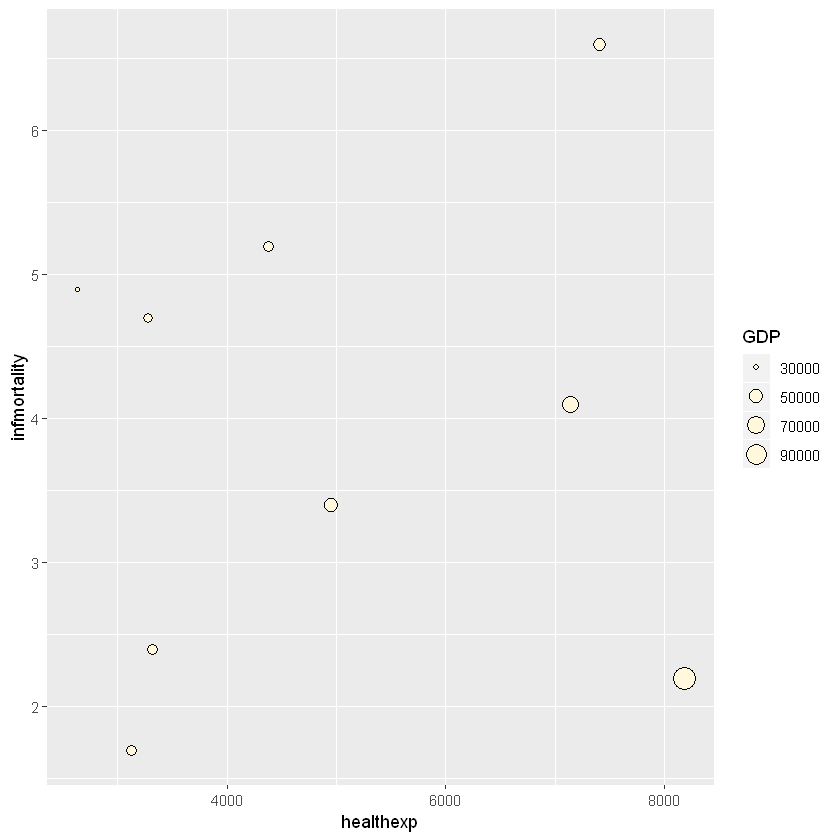

In [45]:
cdat <- subset(countries, Year == 2009 &
               Name %in% c('Canada', 'Ireland', 'United Kingdom', 'United States',
                           'New Zealand', 'Iceland', 'Japan', 'Luxembourg',
                           'Netherland', 'Switzerland'))
p <- ggplot(cdat, aes(x = healthexp, y = infmortality, size = GDP)) +
  geom_point(shape = 21, color = 'black', fill = 'cornsilk')
p

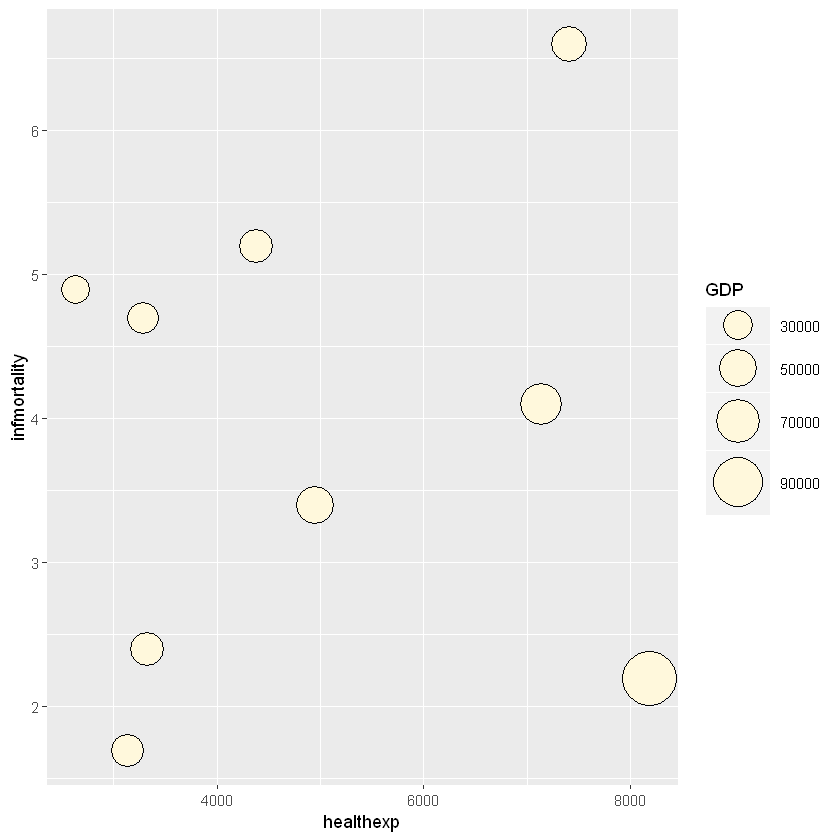

In [46]:
# aes 함수에 size = GDP를 설정하고 geom_point() 함수를 이용하면 변수 GDP의 값에 비례하여 점의 크기가 그려짐.
# max_size는 가장 큰 점의 사이즈를 설정. range = c(3, 10)는 점의 크기를 범위로 설정.
p + scale_size_area(max_size = 15)